## Laboratory work No. 1
### Linear image filtering and Selection of object boundaries

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### a) Importing and inventing image

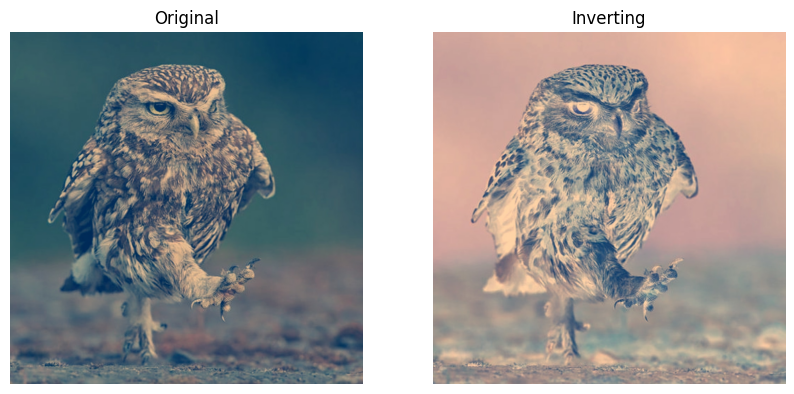

In [18]:
img_bgr = cv2.imread("data\img.jpg")
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

inverted_img = 255 - img

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(inverted_img)
plt.title("Inverting")
plt.axis("off")

plt.show()

### b) For some component performs a change, for example, to adds some constant value to each pixel

(np.float64(-0.5), np.float64(999.5), np.float64(999.5), np.float64(-0.5))

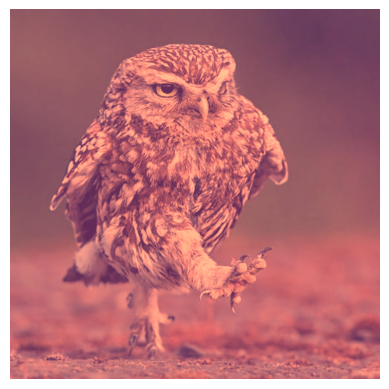

In [19]:
modified_img = img.copy()
modified_img[:, :, 0] = cv2.add(modified_img[:, :, 0], 100)

plt.imshow(modified_img)
plt.axis("off")

### c) Splits the image into Red, Green and Blue components

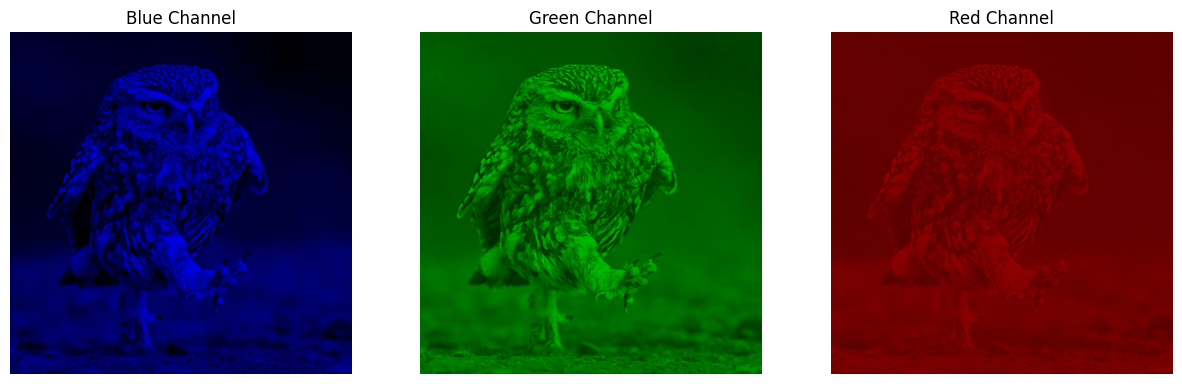

In [20]:
blue, green, red = cv2.split(img)

zeros = np.zeros_like(blue)

blue_img = cv2.merge([blue, zeros, zeros])
green_img = cv2.merge([zeros, green, zeros])
red_img = cv2.merge([zeros, zeros, red])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(cv2.cvtColor(blue_img, cv2.COLOR_BGR2RGB))
axes[0].set_title("Blue Channel")
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(green_img, cv2.COLOR_BGR2RGB))
axes[1].set_title("Green Channel")
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(red_img, cv2.COLOR_BGR2RGB))
axes[2].set_title("Red Channel")
axes[2].axis('off')

plt.show()

### d) "Fusion" of two images

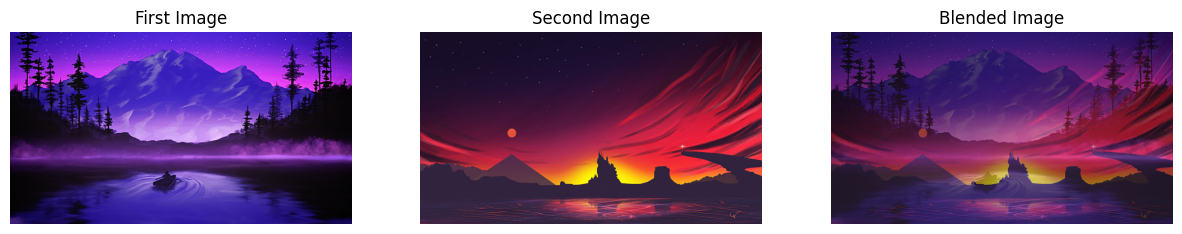

In [21]:
img1 = cv2.imread("data/1.jpg")
img2 = cv2.imread("data/2.jpg")

alpha = 0.4

Imagenew = cv2.addWeighted(img1, alpha, img2, 1 - alpha, 0)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axes[0].set_title("First Image")
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axes[1].set_title("Second Image")
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(Imagenew, cv2.COLOR_BGR2RGB))
axes[2].set_title("Blended Image")
axes[2].axis('off')

plt.show()


### e) Convolution

In [22]:
def filter(img, kernel, filter_name):
    rows, cols, channels = img.shape
    kernel_h, kernel_w = kernel.shape
    offset_h, offset_w = kernel_h // 2, kernel_w // 2

    out = np.zeros_like(img, dtype=np.float32)

    for r in range(offset_h, rows - offset_h):
        for c in range(offset_w, cols - offset_w):
            for ch in range(channels):
                block = img[r - offset_h:r + offset_h + 1, c - offset_w:c + offset_w + 1, ch]
                out[r, c, ch] = np.sum(block * kernel)

    out = np.clip(out, 0, 255).astype(np.uint8)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(out)
    plt.title(filter_name)
    plt.axis("off")

    plt.show()

### Blur filter

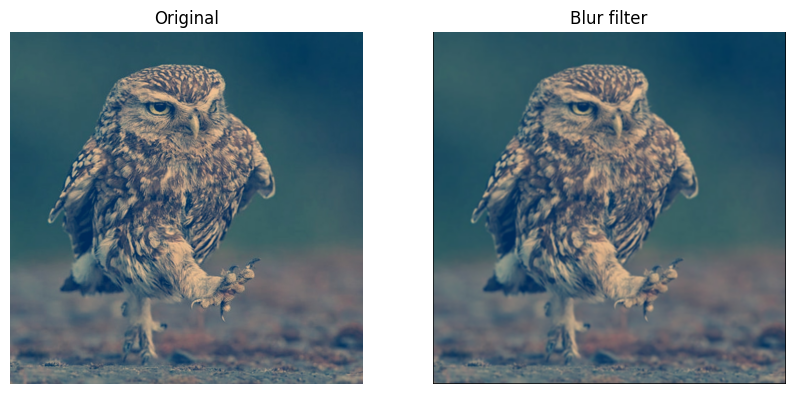

In [23]:
kernel = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1]
])/25
filter(img, kernel, "Blur filter")

### Filter clarity improvement

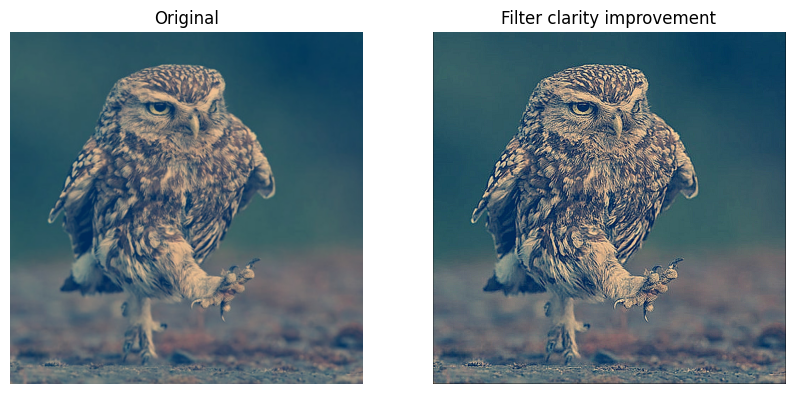

In [24]:
kernel = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
])
filter(img, kernel, "Filter clarity improvement")

### Median filter

In [25]:
def median_filter_custom(img, kernel_size):
    rows, cols, channels = img.shape
    offset = kernel_size // 2

    filtered_img = np.zeros_like(img)

    for r in range(offset, rows - offset):
        for c in range(offset, cols - offset):
            for ch in range(channels):
                block = img[r - offset:r + offset + 1, c - offset:c + offset + 1, ch]
                filtered_img[r, c, ch] = np.median(block)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_img)
    plt.title(f"Median Filter {kernel_size}x{kernel_size}")
    plt.axis("off")

    plt.show()

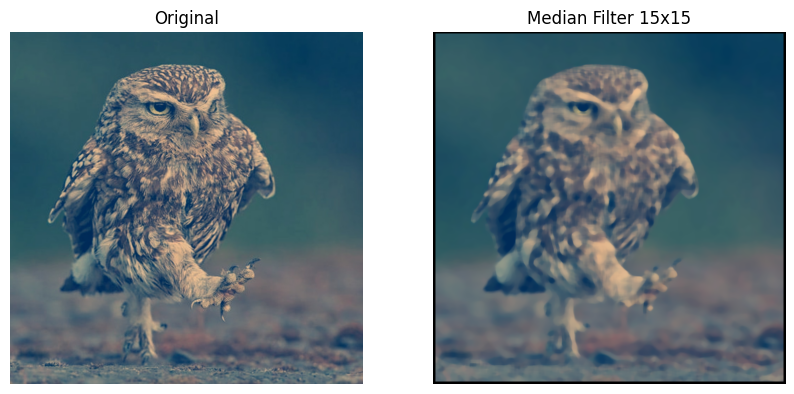

In [26]:
kernel_size = 15
median_filter_custom(img, kernel_size)

### Erosion and Dilation

In [27]:
def filter_erosian_dilation(img, kernel):
    rows, cols, channels = img.shape
    kernel_h, kernel_w = kernel.shape
    offset_h, offset_w = kernel_h // 2, kernel_w // 2

    out_ers = np.zeros_like(img, dtype=np.float32)
    out_dlt = np.zeros_like(img, dtype=np.float32)

    for r in range(offset_h, rows - offset_h):
        for c in range(offset_w, cols - offset_w):
            for ch in range(channels):
                block = img[r - offset_h:r + offset_h + 1, c - offset_w:c + offset_w + 1, ch]
                out_ers[r, c, ch] = np.min(block)
                out_dlt[r, c, ch] = np.max(block)

    out_ers = np.clip(out_ers, 0, 255).astype(np.uint8)
    out_dlt = np.clip(out_dlt, 0, 255).astype(np.uint8)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(out_ers)
    axes[0].set_title("Erosion")
    axes[0].axis('off')

    axes[1].imshow(img)
    axes[1].set_title("Original Image")
    axes[1].axis('off')

    axes[2].imshow(out_dlt)
    axes[2].set_title("Dilation")
    axes[2].axis('off')

    plt.show()

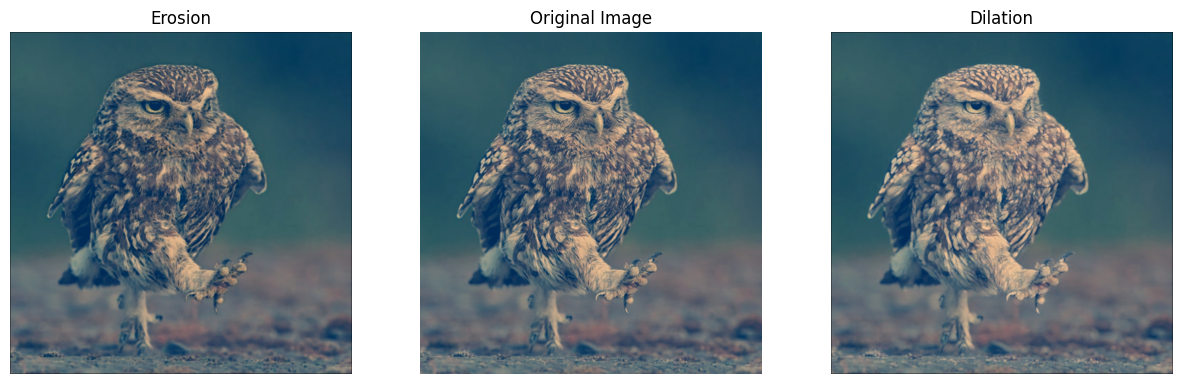

In [28]:
kernel = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])
filter_erosian_dilation(img, kernel)

### Sobel Filter

In [29]:
def sobel_filter(img):
    rows, cols, channels = img.shape
    x_kernel = np.array([[-1, 0, 1],
                                [-2, 0, 2],
                                [-1, 0, 1]])

    y_kernel = np.array([[-1, -2, -1],
                                [0, 0, 0],
                                [1, 2, 1]])

    offset = 1
    out_x = np.zeros_like(img, dtype=np.float32)
    out_y = np.zeros_like(img, dtype=np.float32)
    out = np.zeros_like(img, dtype=np.float32)

    for r in range(offset, rows - offset):
        for c in range(offset, cols - offset):
            for ch in range(channels):
                block = img[r - offset:r + offset + 1, c - offset:c + offset + 1, ch]
                out_x[r, c, ch] = np.sum(block * x_kernel)
                out_y[r, c, ch] = np.sum(block * y_kernel)
                out[r, c, ch] = np.sqrt(out_x[r, c, ch]**2 + out_y[r, c, ch]**2)

    out = np.clip(out, 0, 255).astype(np.uint8)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(out)
    plt.title("Sobel Filter")
    plt.axis("off")

    plt.show()

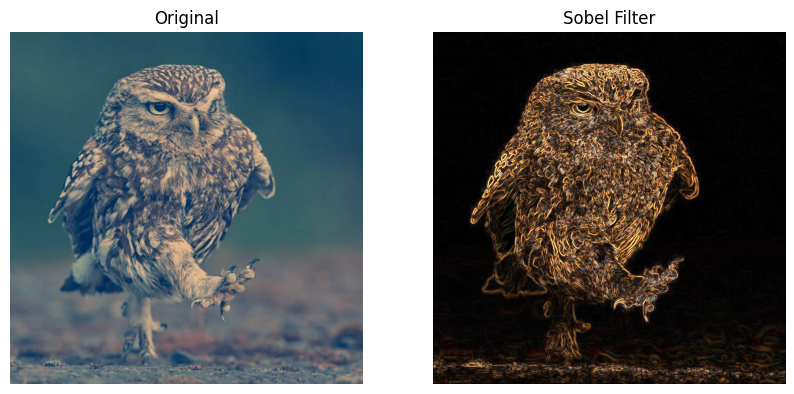

In [30]:
sobel_filter(img)

### Median Filter on Video

In [31]:
def temporal_median_filter(video_path, k=1):
    cap = cv2.VideoCapture(video_path)
    frames = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)

    cap.release()
    frames = np.array(frames[::k])

    median_img = np.median(frames, axis=0)

    median_img = median_img.astype(np.uint8)

    plt.figure(figsize=(10, 5), facecolor='white')

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(frames[0], cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(median_img, cv2.COLOR_BGR2RGB))
    plt.title("Median Filter")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

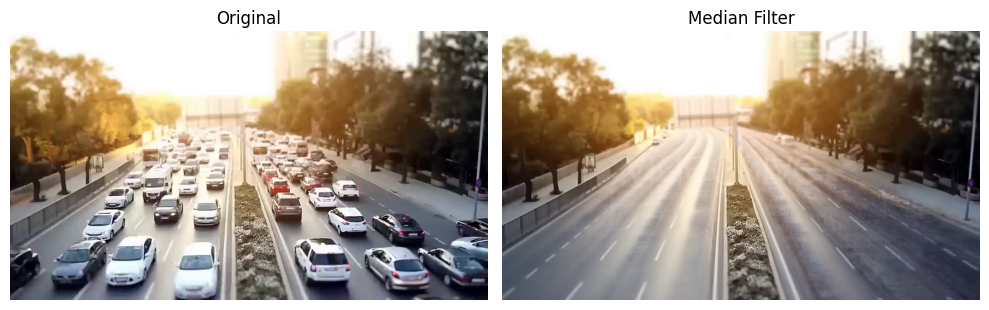

In [32]:
temporal_median_filter('../data/videoplayback1.mp4', k=1)